If you create dataset and labelling in roboflow

In [ ]:
# !pip install roboflow  # Install the Roboflow library if it's not already installed

# from roboflow import Roboflow

# try:
#     # Replace with your actual Roboflow API key
#     api_key = "YOUR_ROBoflow_API_KEY"

#     # Create a Roboflow object using your API key
#     rf = Roboflow(api_key=api_key)

#     # Replace with your workspace and project names
#     workspace_name = "YOUR_WORKSPACE_NAME"
#     project_name = "YOUR_PROJECT_NAME"

#     # Access the desired project version
#     version_number = 1  # Adjust if you want a different version
#     version = project.version(version_number)

#     # Download the dataset in the YOLOv8 format
#     dataset = version.download("yolov8")

#     print("Dataset downloaded successfully!")

# except Exception as e:
#     print("An error occurred:", e)


In [ ]:
folder_name='' # name of your dataset folder

In [ ]:
# install these to avoid potential dependency errors
%pip install torch torchvision torchaudio
%pip install opencv-contrib-python-headless

# install and import Ultralytics YOLOv8
%pip install ultralytics==8.0.196
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

import yaml

# import packages to retrieve and display image files
import glob
import os
import shutil
from PIL import Image
from IPython.display import display


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/78.2 GB disk)


In [ ]:
# store working directory path as work_dir
work_dir = os.getcwd()

# print work_dir path
print(os.getcwd())

# print work_dir contents
print(os.listdir(f"{work_dir}"))

/content
['.config', 'best60.pt', 'yolov8n.pt', 'Wild-animal-detection-7', 'runs']


In [ ]:
# store working directory path as work_dir
work_dir = os.getcwd()

# print work_dir path
print(os.getcwd())

# print work_dir contents
print(os.listdir(f"{work_dir}"))

/content
['.config', 'best60.pt', 'yolov8n.pt', 'Wild-animal-detection-7', 'runs']


In [ ]:
# print Wild-animal-detection-4 subdirectory contents
print(os.listdir(f"{work_dir}/{folder_name}"))

['valid', 'data.yaml', 'train', 'README.roboflow.txt', 'test', 'README.dataset.txt']


In [ ]:
def organize_files(directory):
    for subdir in ['train', 'test', 'valid']:
        subdir_path = os.path.join(directory, subdir)
        if not os.path.exists(subdir_path):
            continue

        images_dir = os.path.join(subdir_path, 'images')
        labels_dir = os.path.join(subdir_path, 'labels')

        # create image and label subdirs if non-existent
        os.makedirs(images_dir, exist_ok=True)
        os.makedirs(labels_dir, exist_ok=True)

        # move images and labels to respective subdirs
        for filename in os.listdir(subdir_path):
            if filename.endswith('.txt'):
                shutil.move(os.path.join(subdir_path, filename), os.path.join(labels_dir, filename))
            elif filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
                shutil.move(os.path.join(subdir_path, filename), os.path.join(images_dir, filename))
            # delete .xml files
            elif filename.endswith('.xml'):
                os.remove(os.path.join(subdir_path, filename))

if __name__ == "__main__":
    directory = f"{work_dir}/{folder_name}/"
    organize_files(directory)

In [ ]:
# contents of new confg.yaml file
def update_yaml_file(file_path):
    data = {
        'path': f'/content/{folder_name}',
        'train': f'/content/{folder_name}/train',
        'val': f'/content/{folder_name}/valid',
        'test': f'/content/{folder_name}/test',
        'names': {
            0: 'Cheetah',
            1: 'fox',
            2: 'hyena',
            3: 'lion',
            4: 'tiger',
            5: 'wolf'
        }
    }

    # ensures the "names" list appears after the sub/directories
    names_data = data.pop('names')
    with open(file_path, 'w') as yaml_file:
        yaml.dump(data, yaml_file)
        yaml_file.write('\n')
        yaml.dump({'names': names_data}, yaml_file)

if __name__ == "__main__":
    file_path = f"{work_dir}/{folder_name}/config.yaml" #.yaml file path
    update_yaml_file(file_path)
    print(f"{file_path} updated successfully.")

/content/Wild-animal-detection-7/config.yaml updated successfully.


In [ ]:
saved_model_path= '' # give the trained model path which is imported to the runtime
epoches=50

Train from begining

In [ ]:
# !yolo task=detect mode=train data={work_dir}/{folder_name}/config.yaml model=yolov8m.pt epochs={epoches} batch=32 lr0=.04 plots=True


# This line executes a YOLO object detection training script.

# Arguments:
#   - task: Set to "detect" indicating the model will be trained for object detection.
#   - mode: Set to "train" specifying the script will perform training.
#   - data: Path to the data configuration file (config.yaml) relative to the working directory (`{work_dir}`) and potentially within a subfolder (`{folder_name}`). This file defines details about the training data.
#   - model: Path to the pre-trained YOLOv8 model (`yolov8m.pt` in this case) used as a starting point for training.
#   - epochs: Number of training epochs (`{epoches}`) specifying how many times the model iterates through the entire dataset.
#   - batch: Batch size (`batch=32`) defining the number of images processed together during each training step.
#   - lr0: Initial learning rate (`lr0=.04`) controlling how much the model updates based on training errors.
#   - plots: Set to "True" to enable generation of training plots that visualize performance metrics.

Retrain after training once

Make sure you add the right path everytime you train the previous model

In [ ]:
# !yolo task=detect mode=train data={work_dir}/{folder_name}/config.yaml model='/content/runs/detect/train/weights/best.pt' epochs={epoches} batch=32 lr0=.04 plots=True

# This line executes a YOLO object detection training script.

# Arguments:
#   - task: Set to "detect" indicating the model will be trained for object detection.
#   - mode: Set to "train" specifying the script will perform training.
#   - data: Path to the data configuration file (config.yaml) relative to the working directory (`{work_dir}`) and potentially within a subfolder (`{folder_name}`). This file defines details about the training data.
#   - model: Path to the pre-trained YOLO model (`/content/runs/detect/train/weights/best.pt` in this case) used as a starting point for training. This appears to be the best model from a previous training run based on its location and name.
#       - Note: The path suggests you might be using Google Colab for training (based on the `/content` directory).
#   - epochs: Number of training epochs (`{epoches}`) specifying how many times the model iterates through the entire dataset.
#   - batch: Batch size (`batch=32`) defining the number of images processed together during each training step.
#   - lr0: Initial learning rate (`lr0=.04`) controlling how much the model updates based on training errors.
#   - plots: Set to "True" to enable generation of training plots that visualize performance metrics.


New https://pypi.org/project/ultralytics/8.2.22 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train3/weights/best.pt, data=/content/Wild-animal-detection-7/config.yaml, epochs=50, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, l

Loading model and then training

In [ ]:
# !yolo task=detect mode=train data={work_dir}/{folder_name}/config.yaml model={saved_model_path} epochs={epoches} batch=32 lr0=.04 plots=True

# This line executes a YOLO object detection training script.

# Arguments:
#   - task: Set to "detect" indicating the model will be trained for object detection.
#   - mode: Set to "train" specifying the script will perform training.
#   - data: Path to the data configuration file (config.yaml) relative to the working directory (`{work_dir}`) and potentially within a subfolder (`{folder_name}`). This file defines details about the training data.
#   - model: Path to the pre-trained YOLO model (`{saved_model_path}`) used as a starting point for training. You'll need to provide the actual path to your model before running the script.
#   - epochs: Number of training epochs (`{epoches}`) specifying how many times the model iterates through the entire dataset.
#   - batch: Batch size (`batch=32`) defining the number of images processed together during each training step.
#   - lr0: Initial learning rate (`lr0=.04`) controlling how much the model updates based on training errors.
#   - plots: Set to "True" to enable generation of training plots that visualize performance metrics.


New https://pypi.org/project/ultralytics/8.2.22 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/best60.pt, data=/content/Wild-animal-detection-7/config.yaml, epochs=40, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize

Predict entire folder and save to predict
(after training)

In [ ]:
# !yolo task=detect mode=predict source={work_dir}/{folder_name}/test/images model={work_dir}/runs/detect/train/weights/best.pt conf=0.5 iou=.5 save=True save_txt=True

# This line executes a YOLO object detection prediction script.

# Arguments:
#   - task: Set to "detect" indicating the model will be used for object detection.
#   - mode: Set to "predict" specifying the script will perform predictions on new images.
#   - source: Path to the directory containing the test images
#             ( `{work_dir}/{folder_name}/test/images` ).
#             - `{work_dir}`: Placeholder for your working directory path.
#             - `{folder_name}`: Potential subfolder within your working directory named "test" containing a subfolder named "images" with your test images.
#   - model: Path to the pre-trained model for prediction
#             ( `{work_dir}/runs/detect/train/weights/best.pt` ).
#             - This suggests you might have trained a model previously
#               and this is the best performing one based on its name and location.
#   - conf=0.5: Sets the confidence threshold (minimum probability) for detections (default 0.5).
#   - iou=0.5: Sets the Intersection over Union (IoU) threshold for detections (default 0.5).
#             - A predicted bounding box must overlap with the ground truth box by at least this percentage to be considered correct.
#   - save=True: Enables saving the predicted images with bounding boxes visualized on them.
#   - save_txt=True: Enables saving the prediction results (class labels, confidence scores, bounding box coordinates) in text files.


predict using loaded model ( no training)

In [ ]:
!yolo task=detect mode=predict source={work_dir}/{folder_name}/test/images model={saved_model_path} conf=0.5 iou=.5 save=True save_txt=True

# This line executes a YOLO object detection prediction script.

# Arguments:
#   - task: Set to "detect" indicating the model will be used for object detection.
#   - mode: Set to "predict" specifying the script will perform predictions on new images.
#   - source: Path to the directory containing the test images
#             ( `{work_dir}/{folder_name}/test/images` ).
#             - `{work_dir}`: Placeholder for your working directory path.
#             - `{folder_name}`: Potential subfolder within your working directory named "test" containing a subfolder named "images" with your test images.
#   - model: Path to the pre-trained model for prediction (uses placeholder `{saved_model_path}`).
#             - You'll need to provide the actual path to your model before running the script.
#   - conf=0.5: Sets the confidence threshold (minimum probability) for detections (default 0.5).
#   - iou=0.5: Sets the Intersection over Union (IoU) threshold for detections (default 0.5).
#             - A predicted bounding box must overlap with the ground truth box by at least this percentage to be considered correct.
#   - save=True: Enables saving the predicted images with bounding boxes visualized on them.
#   - save_txt=True: Enables saving the prediction results (class labels, confidence scores, bounding box coordinates) in text files.


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs

image 1/165 /content/Wild-animal-detection-7/test/images/00000000_224resized_png.rf.b89e224fd414c2bd54c36fe4f7b2548f.jpg: 640x640 1 hyena, 37.2ms
image 2/165 /content/Wild-animal-detection-7/test/images/00000000_224resized_png.rf.c47419a5ae5178a17a4f9258eb142e9d.jpg: 640x640 1  tiger, 37.1ms
image 3/165 /content/Wild-animal-detection-7/test/images/00000005_224resized_png.rf.ab2182181770167f9b2179dfef02aa94.jpg: 640x640 1 hyena, 37.1ms
image 4/165 /content/Wild-animal-detection-7/test/images/00000008_224resized_png.rf.21378c214e95babc613333aeb648c447.jpg: 640x640 1 wolf, 37.1ms
image 5/165 /content/Wild-animal-detection-7/test/images/00000008_224resized_png.rf.50ee1c04154434d783812d6f0bb73af3.jpg: 640x640 1 Cheetah, 37.1ms
image 6/165 /content/Wild-animal-detection-7/test/images/00000008_224resized_png.rf.5668e4cd322dce

For single image

In [ ]:
# predict_image_path='/content/Wild-animal-detection-7/train/images/00000000_224resized_png.rf.3310f909f36f09f3f65cd635b974a489.jpg'

In [ ]:
# !yolo task=detect mode=predict source={predict_image_path} model={work_dir}/runs/detect/train/weights/best.pt conf=0.5 iou=.5 save=True save_txt=True

# This line executes a YOLO object detection prediction script.

# Arguments:
#   - task=detect mode=predict: Sets the task as object detection in prediction mode.
#   - source=predict_image_path: Path to the single image for prediction
#                                  (stored in the variable `predict_image_path`).
#   - model={work_dir}/runs/detect/train/weights/best.pt: Path to the pre-trained model
#                                                       (potentially the best performing one from a previous training session based on its location and name).
#   - conf=0.5: Sets the confidence threshold (minimum probability) for detections (default 0.5).
#   - iou=0.5: Sets the Intersection over Union (IoU) threshold for detections (default 0.5).
#   - save=True: Enables saving the predicted image with bounding boxes visualized on it.
#   - save_txt=True: Enables saving the prediction results (class labels, confidence scores, bounding box coordinates) in a text file (location depends on script configuration).


/bin/bash: line 1: yolo: command not found


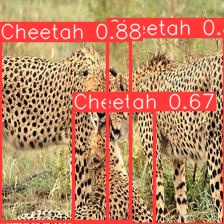

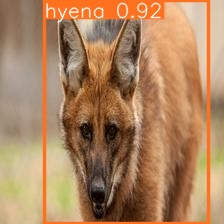

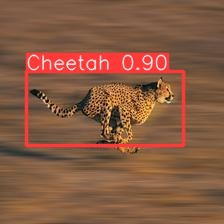

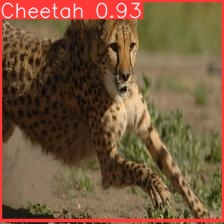

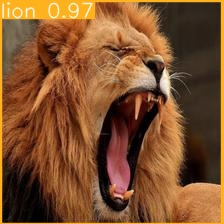

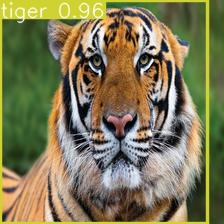

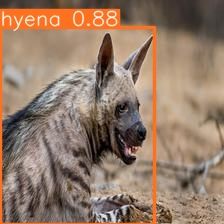

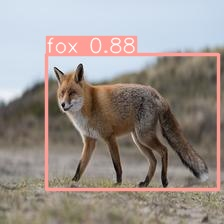

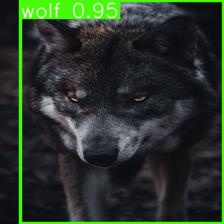

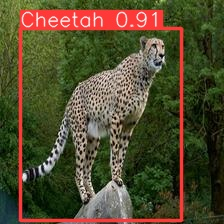

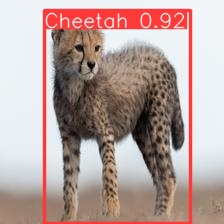

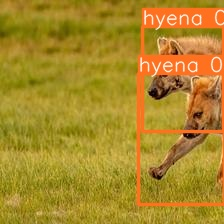

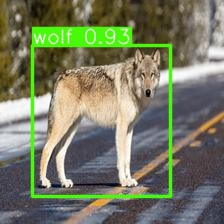

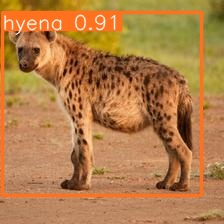

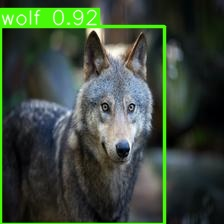

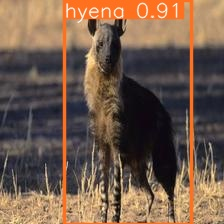

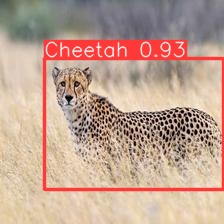

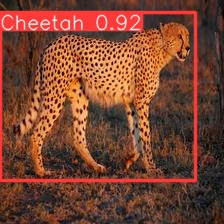

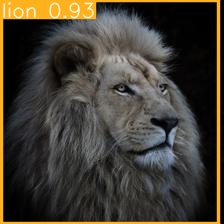

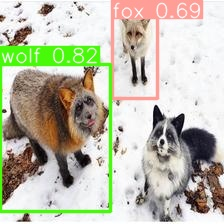

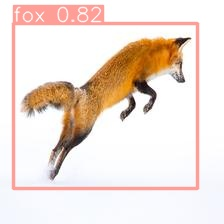

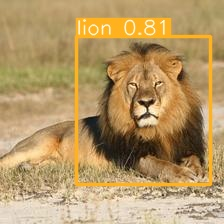

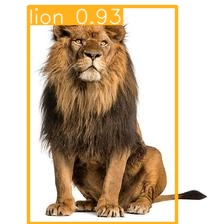

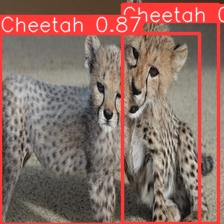

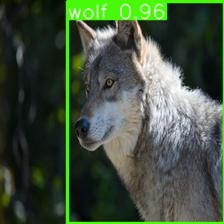

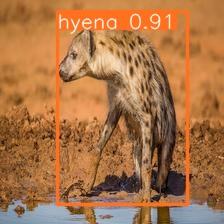

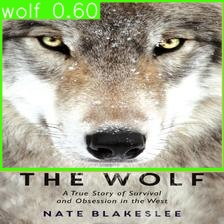

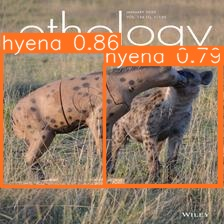

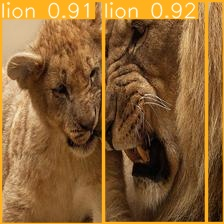

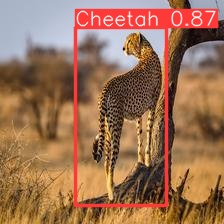

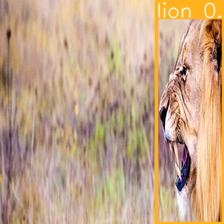

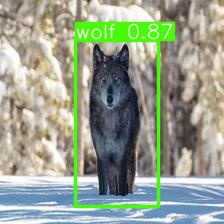

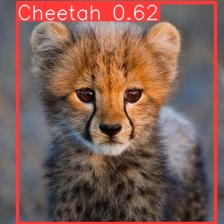

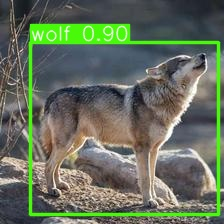

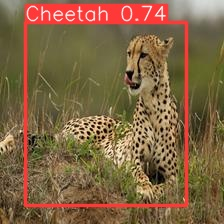

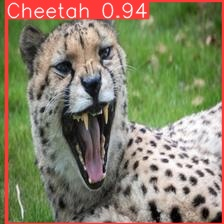

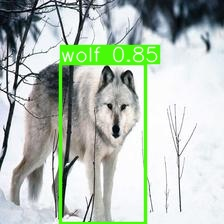

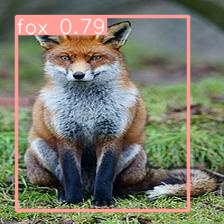

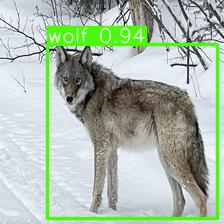

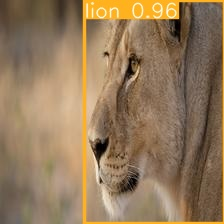

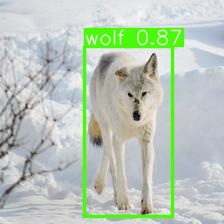

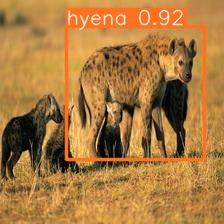

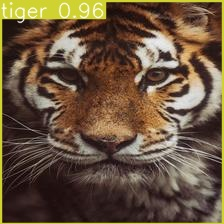

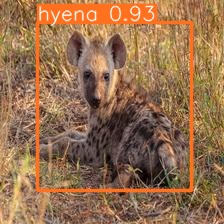

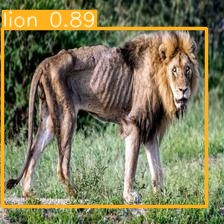

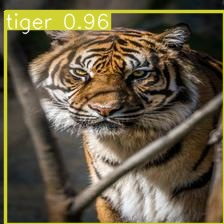

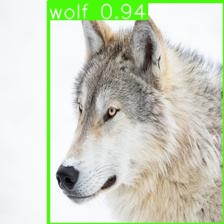

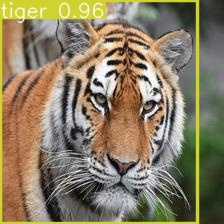

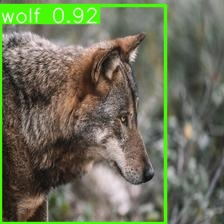

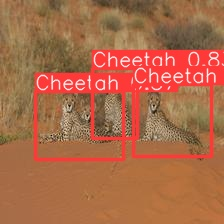

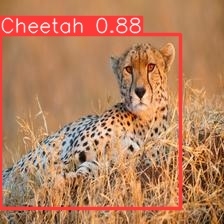

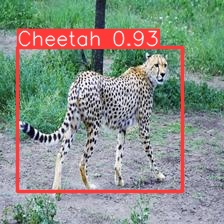

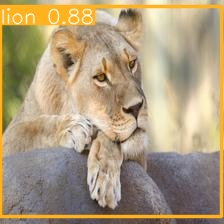

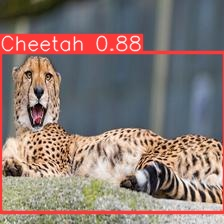

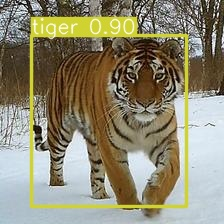

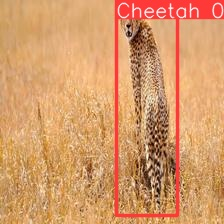

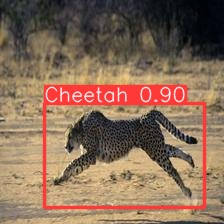

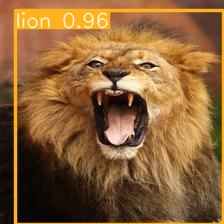

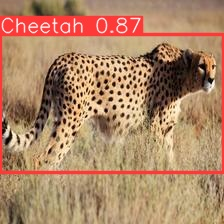

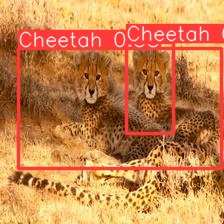

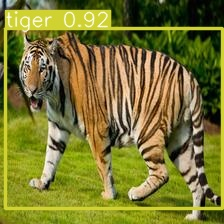

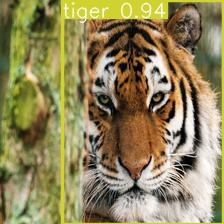

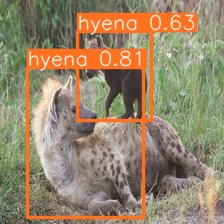

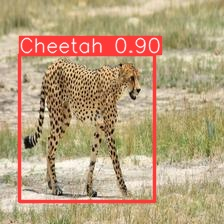

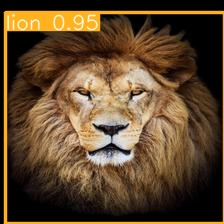

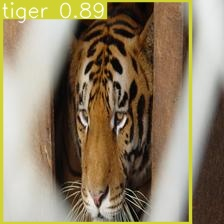

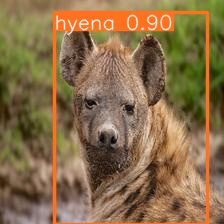

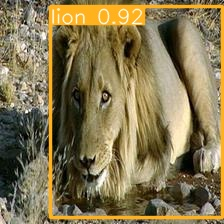

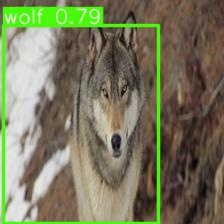

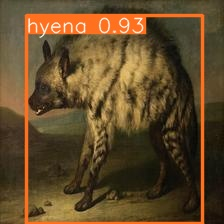

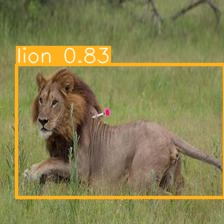

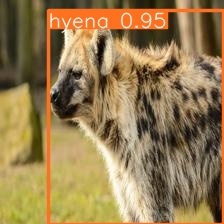

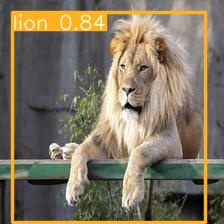

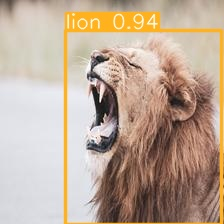

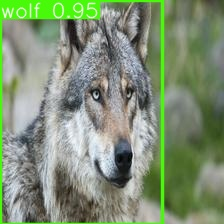

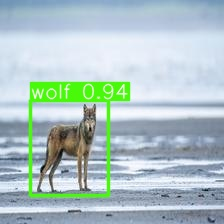

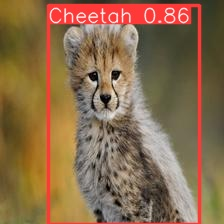

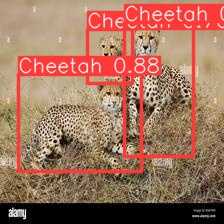

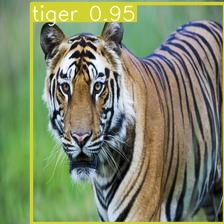

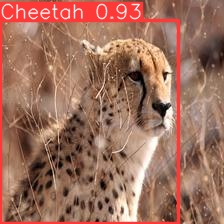

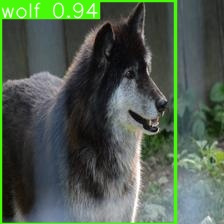

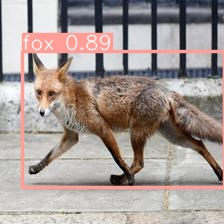

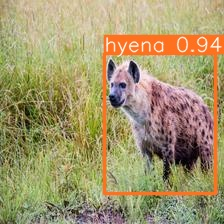

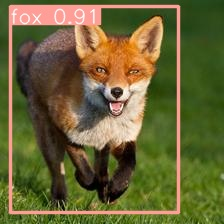

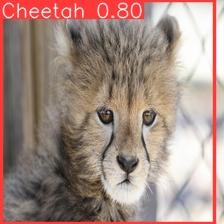

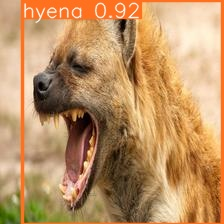

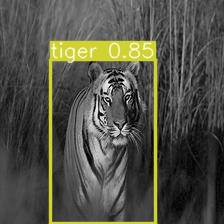

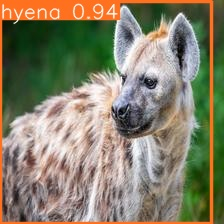

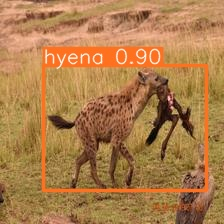

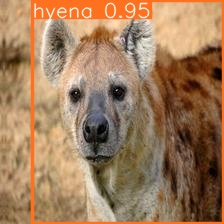

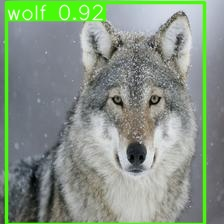

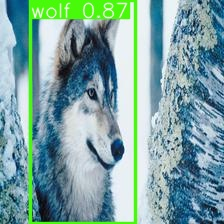

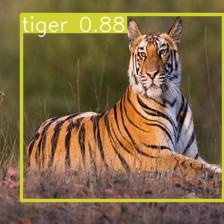

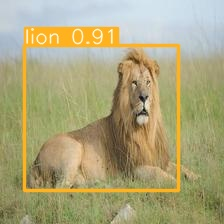

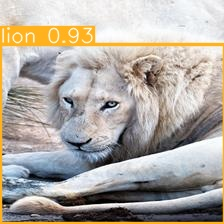

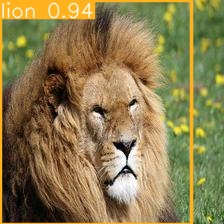

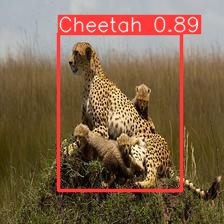

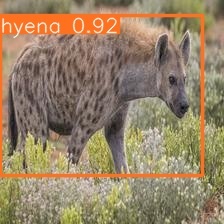

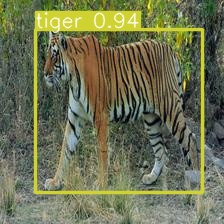

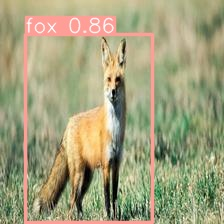

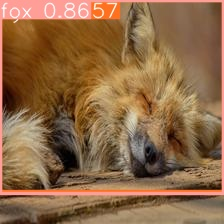

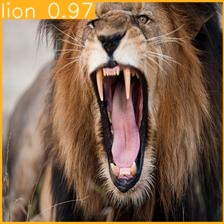

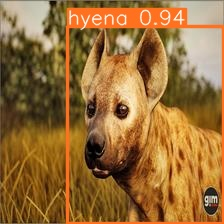

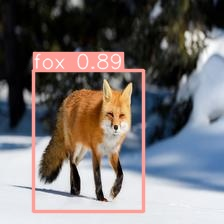

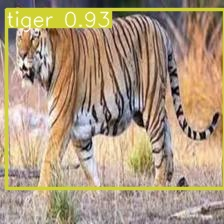

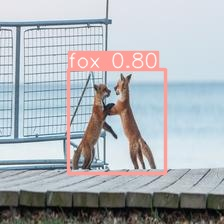

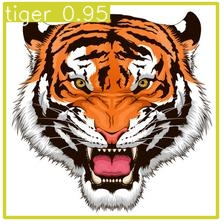

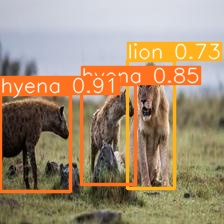

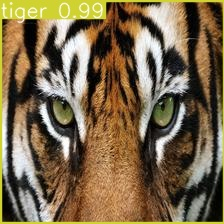

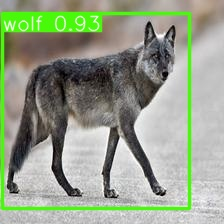

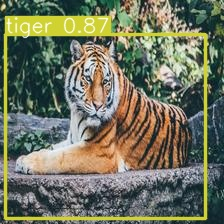

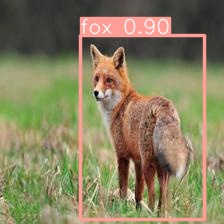

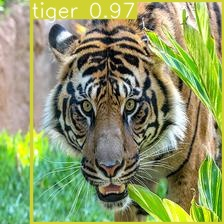

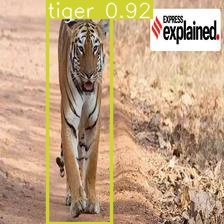

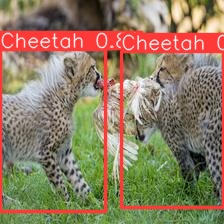

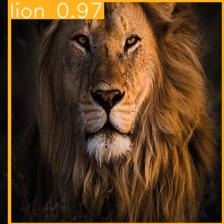

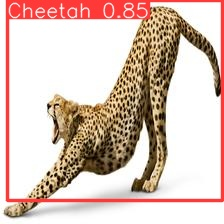

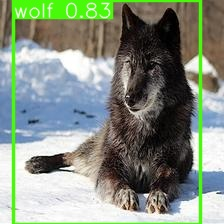

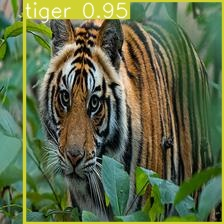

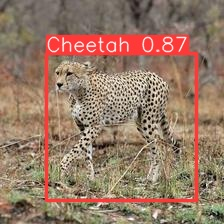

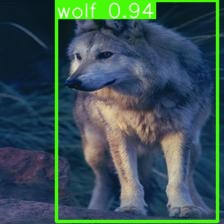

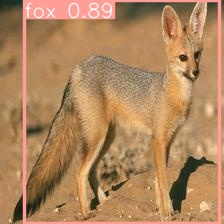

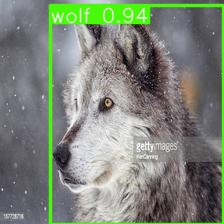

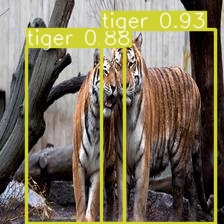

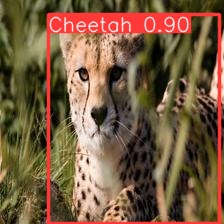

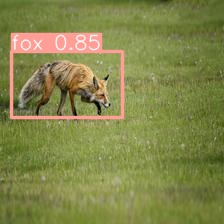

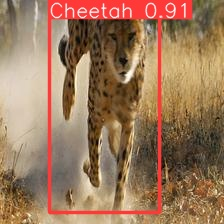

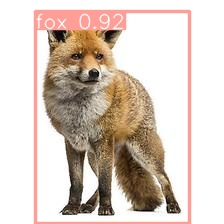

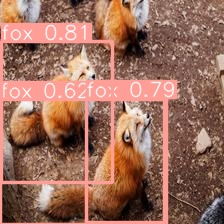

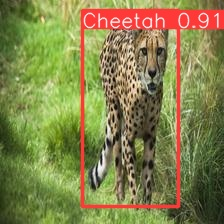

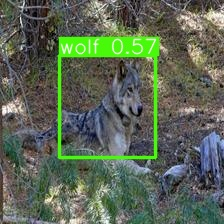

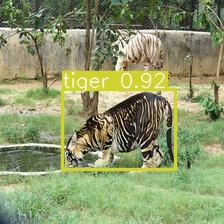

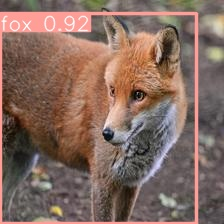

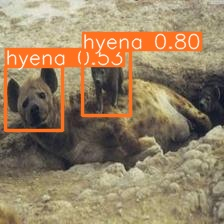

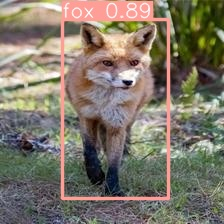

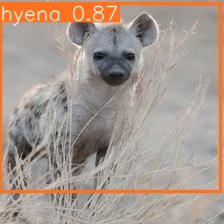

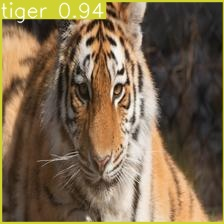

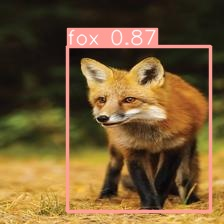

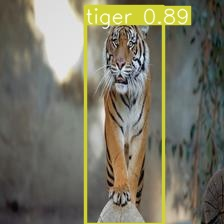

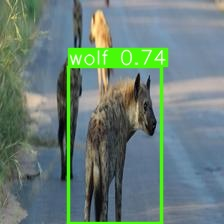

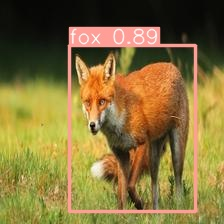

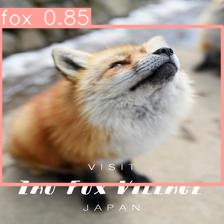

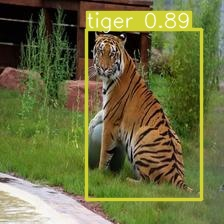

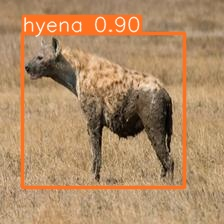

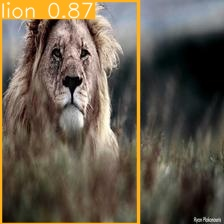

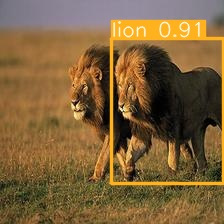

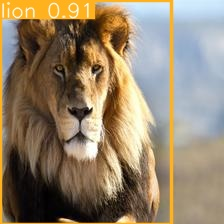

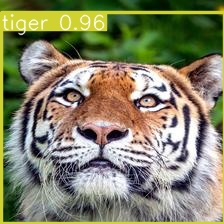

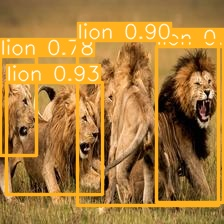

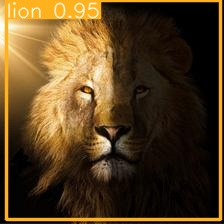

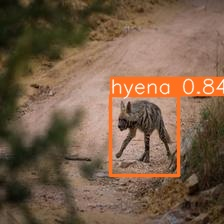

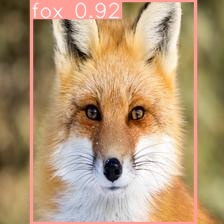

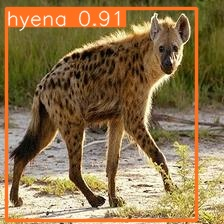

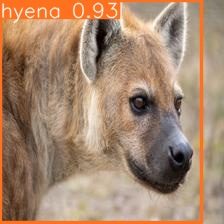

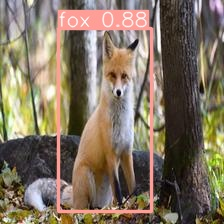

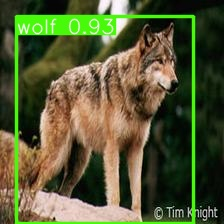

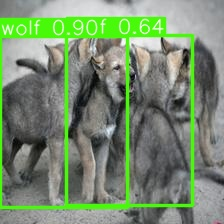

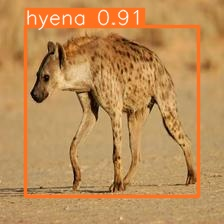

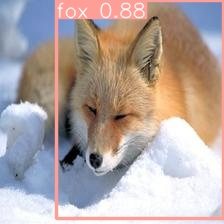

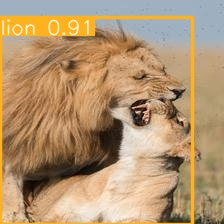

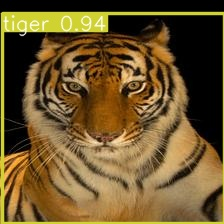

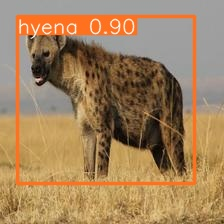

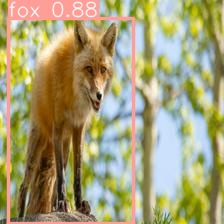

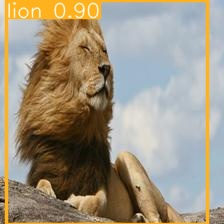

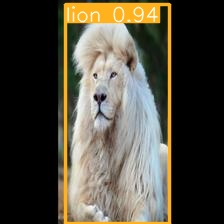

In [ ]:
from IPython.display import Image

# Construct the search pattern for predicted images (JPG format)
pred_image_pattern = f"{work_dir}/runs/detect/predict/*.jpg"

# Loop through the predicted images
for pred_image_path in glob.glob(pred_image_pattern)[:]:  # You can slice to display fewer images
    # Open the image using Image.open with the correct filename argument
    img = Image(filename=pred_image_path)
    # Display the image
    display(img)


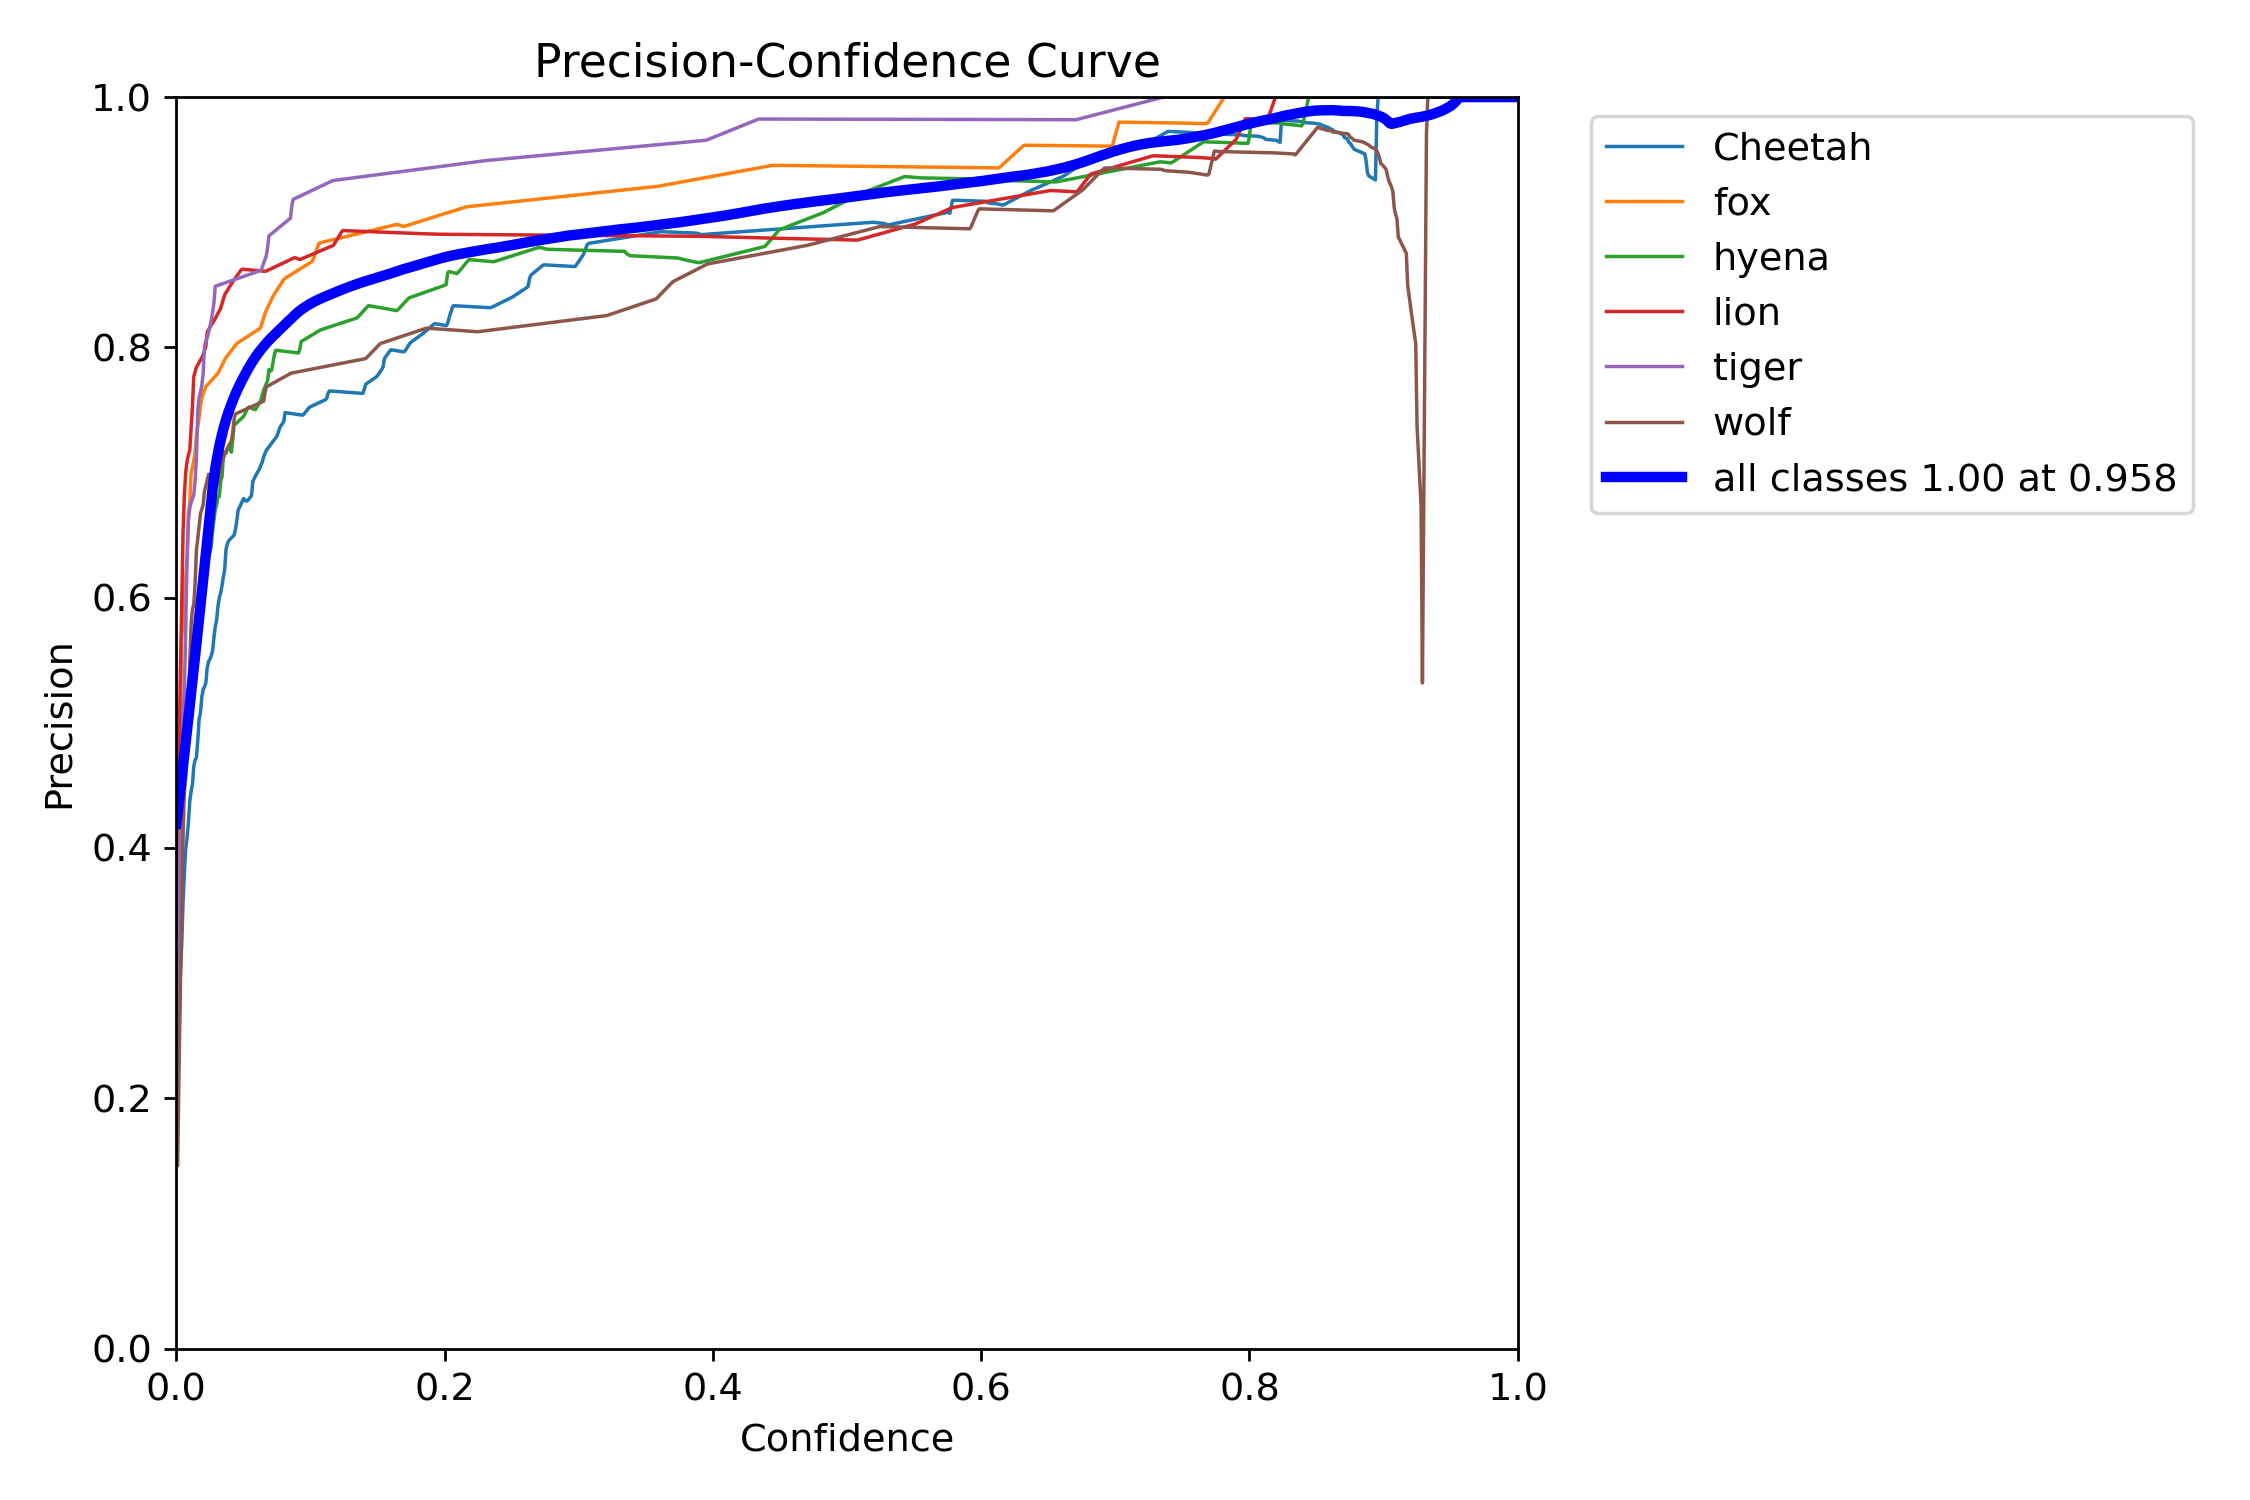

In [ ]:
# Import the Image class from Pillow for image processing
from PIL import Image


# Construct the path to the image file
image_path = f"{work_dir}/runs/detect/train/P_curve.png"

try:
  # Open the image using the Image.open() method
  img = Image.open(image_path)
  # Display the image (implementation depends on your environment)
  # You can use libraries like matplotlib or OpenCV for display
  # Or, if you're using Jupyter Notebook, you can use display()
  display(img)
except FileNotFoundError:
  print(f"Error: Image file not found at {image_path}")


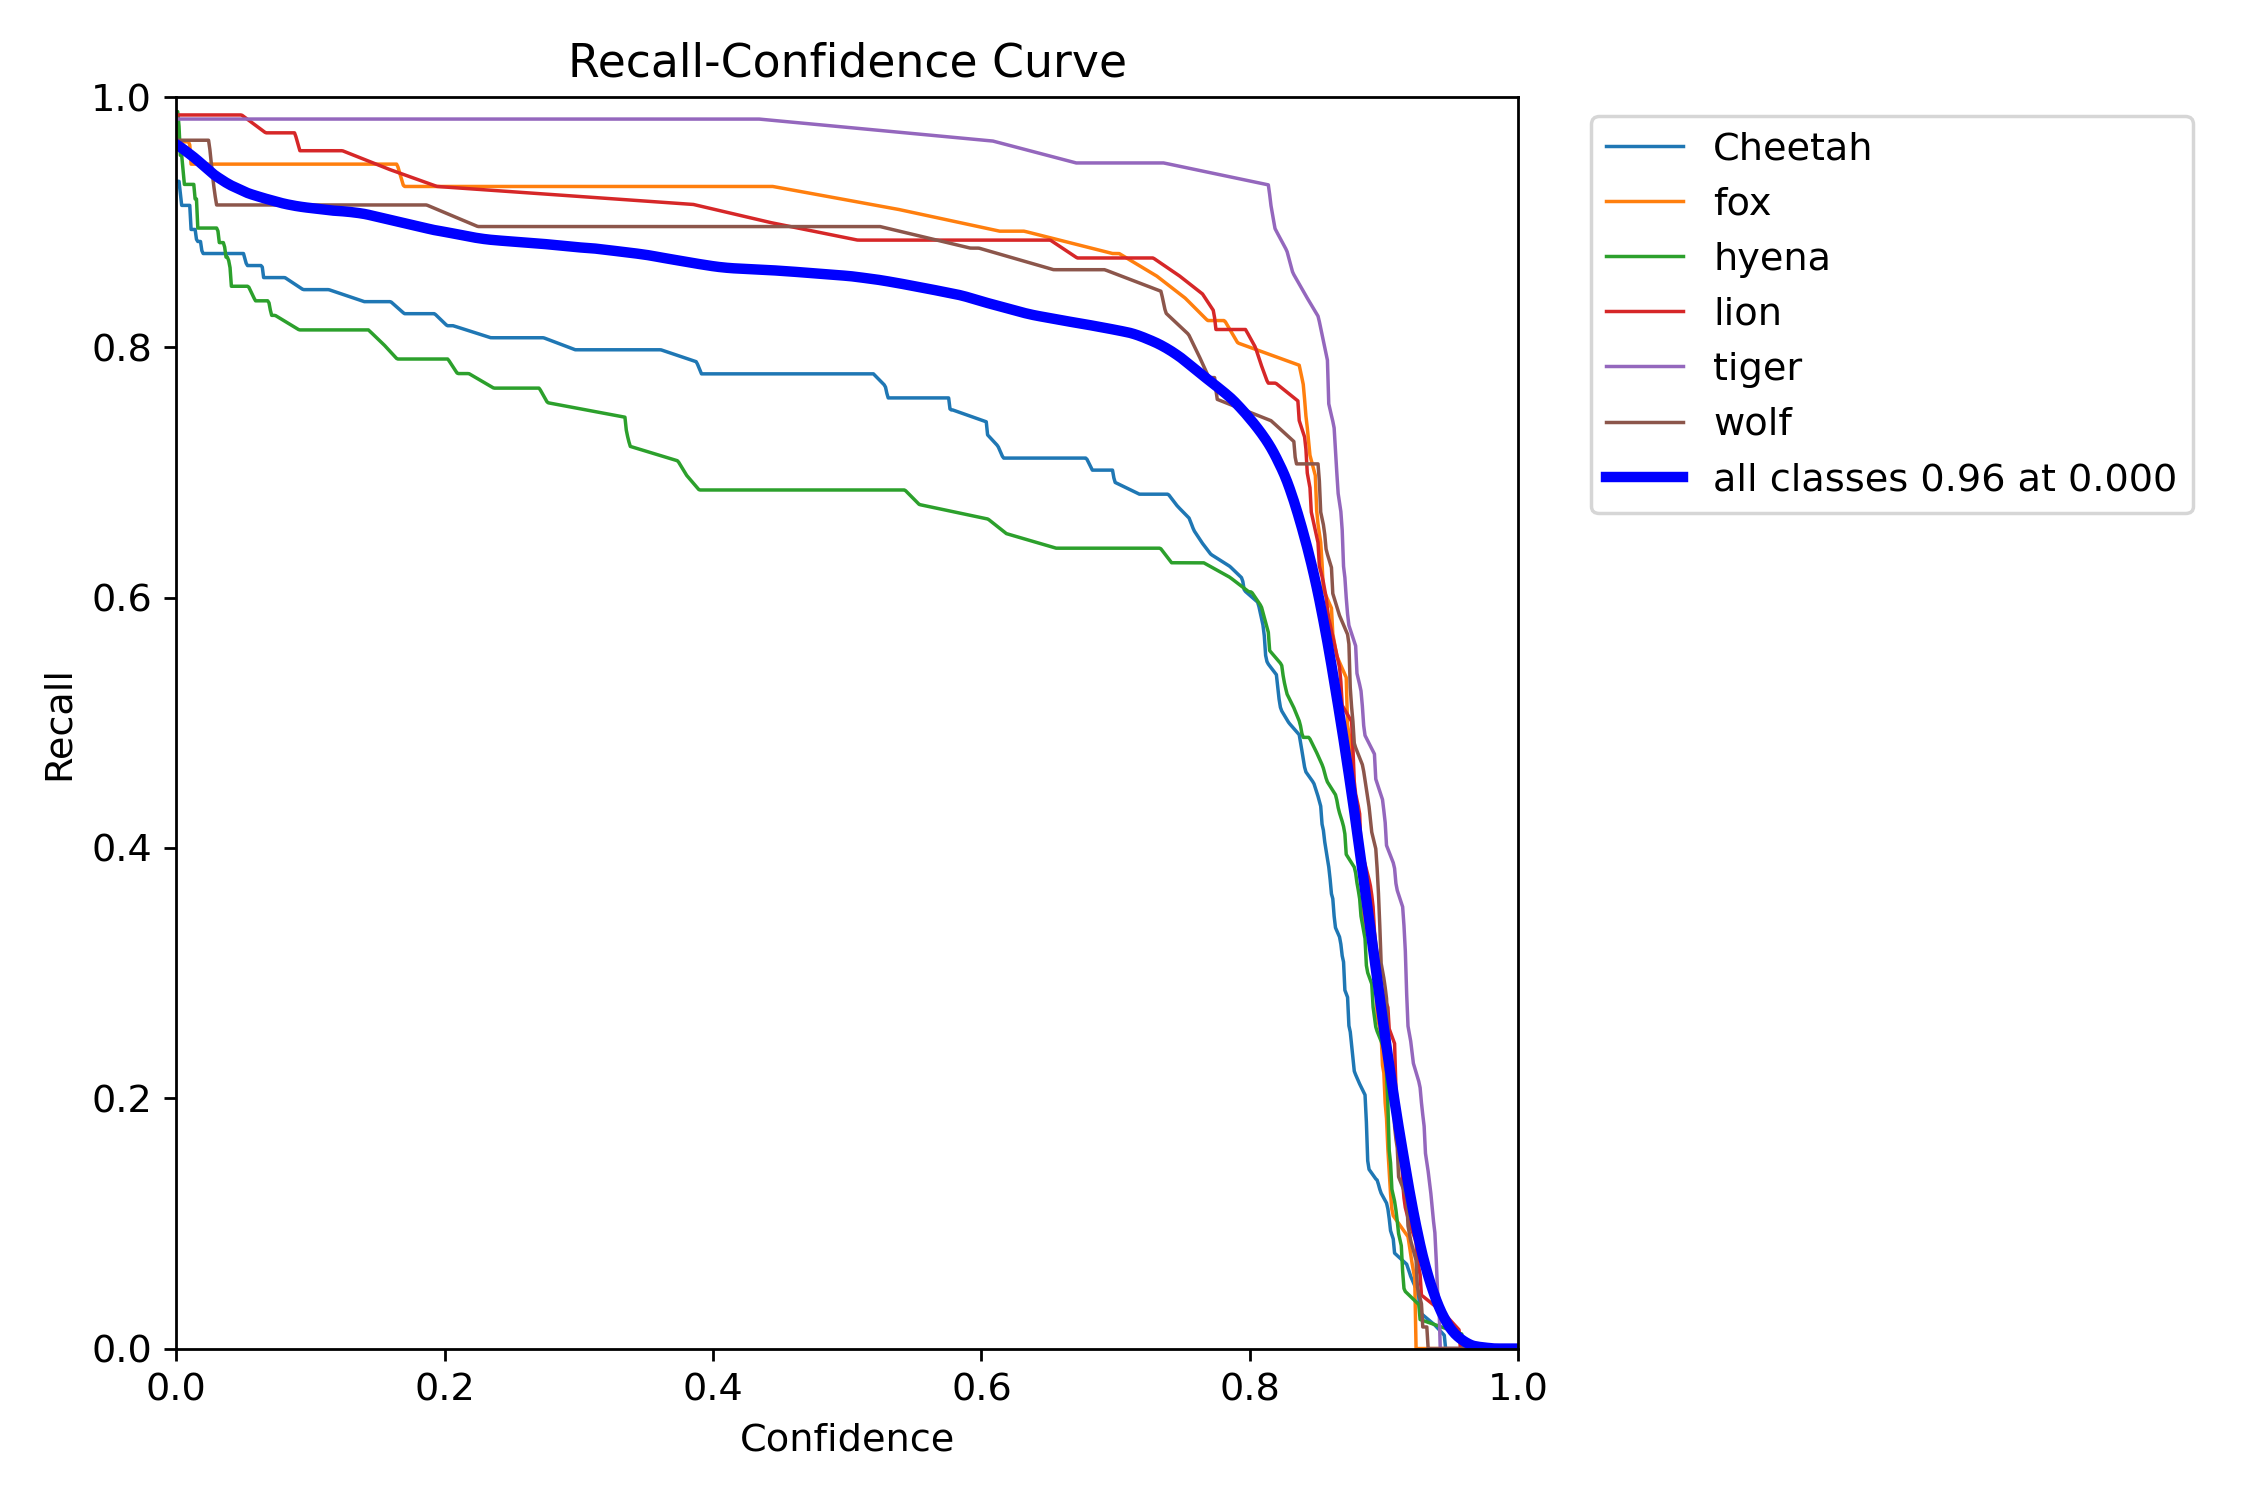

In [ ]:


# Construct the path to the image file
image_path = f"{work_dir}/runs/detect/train/R_curve.png"

try:
  # Open the image using the Image.open() method
  img = Image.open(image_path)
  # Display the image (implementation depends on your environment)
  # You can use libraries like matplotlib or OpenCV for display
  # Or, if you're using Jupyter Notebook, you can use display()
  display(img)
except FileNotFoundError:
  print(f"Error: Image file not found at {image_path}")


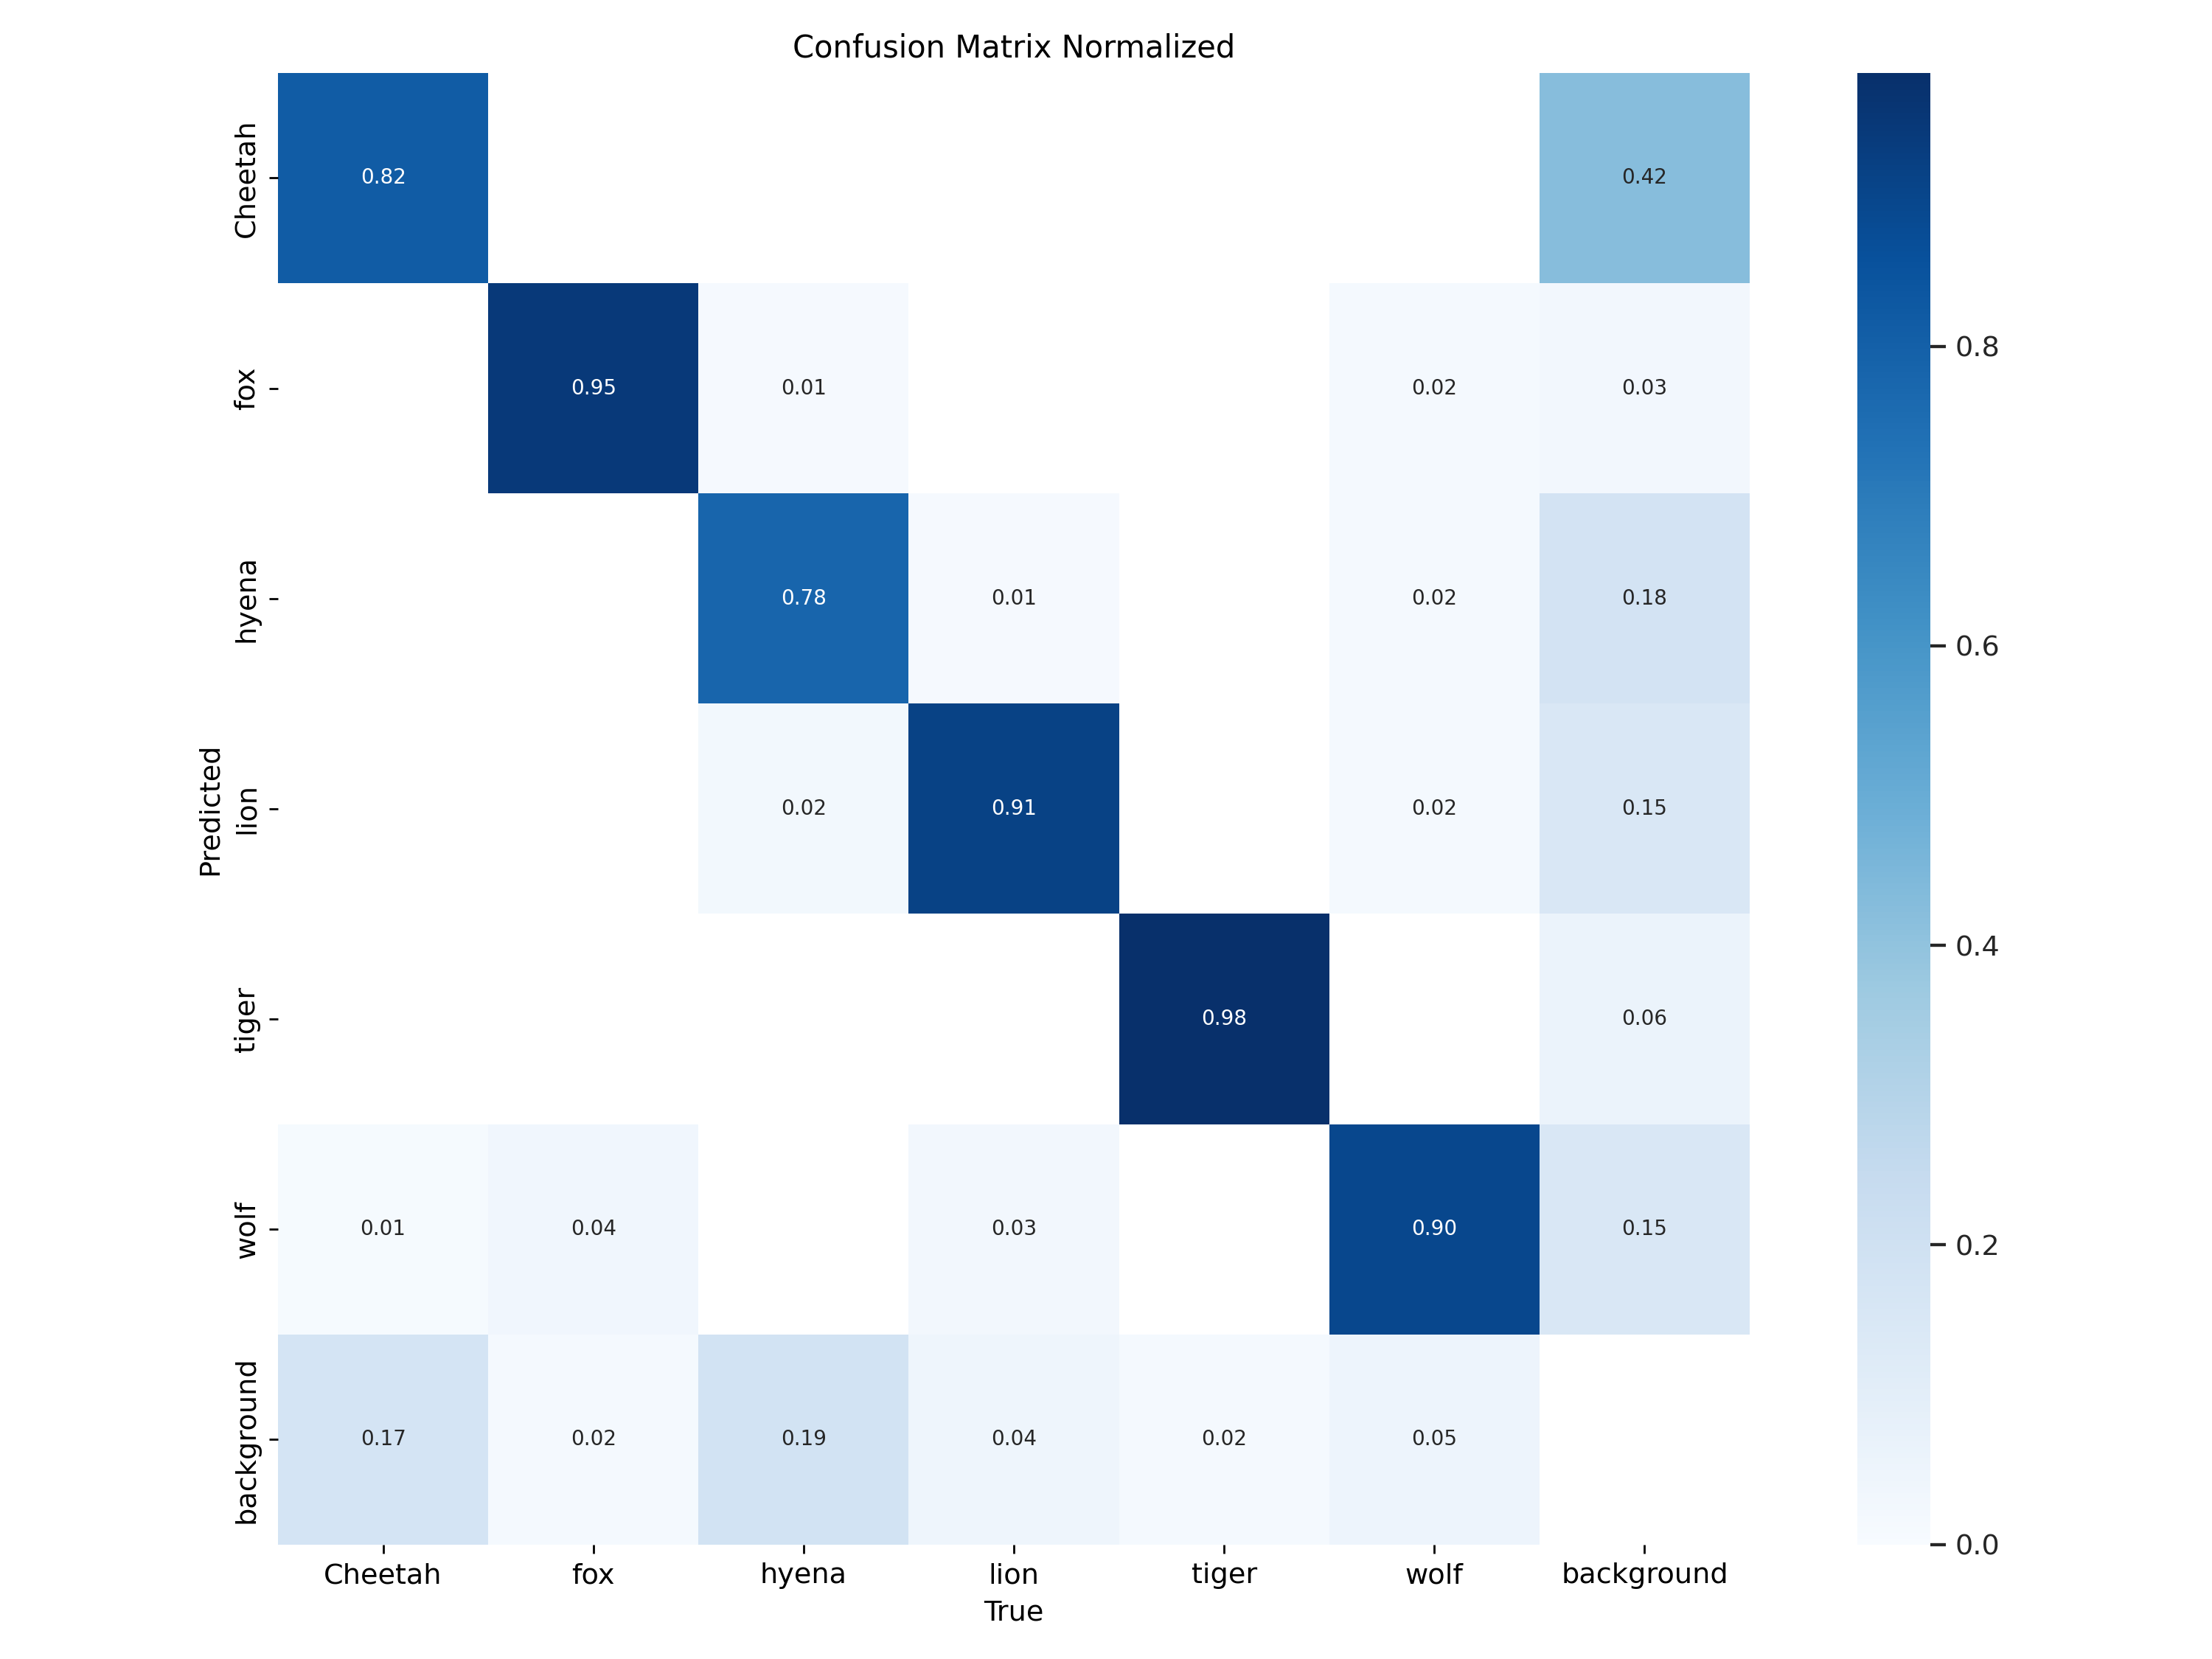

In [ ]:

# Construct the path to the image file
image_path = f"{work_dir}/runs/detect/train/confusion_matrix_normalized.png"

try:
  # Open the image using the Image.open() method
  img = Image.open(image_path)
  # Display the image (implementation depends on your environment)
  # You can use libraries like matplotlib or OpenCV for display
  # Or, if you're using Jupyter Notebook, you can use display()
  display(img)
except FileNotFoundError:
  print(f"Error: Image file not found at {image_path}")


In [ ]:

def compute_iou(gt_box, pred_box):
    x1, y1, w1, h1 = gt_box
    x2, y2, w2, h2 = pred_box

    # produce BBox coordinates from YOLO data
    xmin_gt_box = x1 - w1 / 2
    ymin_gt_box = y1 - h1 / 2
    xmax_gt_box = x1 + w1 / 2
    ymax_gt_box = y1 + h1 / 2

    xmin_pred_box = x2 - w2 / 2
    ymin_pred_box = y2 - h2 / 2
    xmax_pred_box = x2 + w2 / 2
    ymax_pred_box = y2 + h2 / 2

    # calculate intersection of two boxes
    xmin_inter = max(xmin_gt_box, xmin_pred_box)
    ymin_inter = max(ymin_gt_box, ymin_pred_box)
    xmax_inter = min(xmax_gt_box, xmax_pred_box)
    ymax_inter = min(ymax_gt_box, ymax_pred_box)
    inter_area = max(0, xmax_inter - xmin_inter) * max(0, ymax_inter - ymin_inter)

    # calculate union of two boxes
    gt_box_area = w1 * h1
    pred_box_area = w2 * h2
    union_area = gt_box_area + pred_box_area - inter_area

    # IoU equation
    iou = inter_area / union_area if union_area != 0 else 0
    return iou

def extract_boxes(label_content):
    boxes = []
    for line in label_content.strip().split('\n'):
        parts = line.split()
        if len(parts) == 5:  # class, x_center, y_center, width, height
            x_center, y_center, width, height = map(float, parts[1:])
            boxes.append((x_center, y_center, width, height))
    return boxes


In [ ]:
gt_dir = f'{work_dir}/{folder_name}/test/labels'
pred_dir = f'{work_dir}/runs/detect/predict/labels'

# Get the list of files in the ground truth directory
gt_files = os.listdir(gt_dir)

# List to store all IoUs
ious = []

# Loop through each file in the ground truth directory
for gt_file in gt_files:
    # Construct the full paths to the ground truth and prediction files
    gt_path = os.path.join(gt_dir, gt_file)
    pred_path = os.path.join(pred_dir, gt_file)

    # Check if the prediction file exists
    if os.path.exists(pred_path):
        # Read the ground truth coordinates
        with open(gt_path, 'r') as file:
            gt_content = file.read()
            # print(f"Ground truth for {gt_file}:\n" + gt_content)

        # Read the prediction coordinates
        with open(pred_path, 'r') as file:
            pred_content = file.read()
            # print(f"Predictions for {gt_file}:\n" + pred_content)

        # Extract the boxes
        gt_boxes = extract_boxes(gt_content)
        pred_boxes = extract_boxes(pred_content)

        # Calculate and store IoU for each pair of boxes
        for gt_box, pred_box in zip(gt_boxes, pred_boxes):
            iou = compute_iou(gt_box, pred_box)
            ious.append(iou)
            print(f"IoU for {gt_file}:\n \033[0m {iou}\n")
    else:
        print(f"Prediction file for {gt_file} not found.")

# Calculate and print max, min, and average IoU
if ious:
    max_iou = max(ious)
    avg_iou = sum(ious) / (len(ious) -10)
    print(f"Max IoU: {max_iou}")
    print(f"Avg IoU: {avg_iou}")
else:
    print("No IoUs calculated.")

IoU for 00000195_224resized_png.rf.3c8b00d0c91acadfd9a9614cb2084a12.txt:
  0.05344464508958073

IoU for 00000195_224resized_png.rf.3c8b00d0c91acadfd9a9614cb2084a12.txt:
  0.023243896432638356

IoU for 00000008_224resized_png.rf.5668e4cd322dce23220cd58c5ab33b9f.txt:
  0.7814190950865437

IoU for 00000419_224resized_png.rf.8eab9d1975572c602c4be72850bd1509.txt:
  0.5842560378624579

IoU for 00000227_224resized_png.rf.26767c4f466b97db749e3fade0d81d50.txt:
  0.8325460983166659

IoU for 00000477_224resized_png.rf.a1eee8a12157a1acfa074caf358d3c7e.txt:
  0.9586818981960796

IoU for 00000386_224resized_png.rf.068f0d1767860133c778ec86e966222f.txt:
  0.8991220014390748

IoU for 00000223_224resized_png.rf.97240950d02bf90d02d3a112d130ffd9.txt:
  0.8604354064367644

IoU for 00000210_224resized_png.rf.69f23163d6d93156292c54edc94925f9.txt:
  0.8186617445167488

IoU for 00000429_224resized_png.rf.bf4d13468bf6a26f6e72386f3461893b.txt:
  0.843163867087637

IoU for 00000044_224resized_png.rf.d0e0e0890bbc0